Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

ROC AUC: 0.4999277422711327
[[553494     80]
 [  2145      0]]

Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    553574
           1       0.01      0.33      0.01      2145

    accuracy                           0.82    555719
   macro avg       0.50      0.58      0.46    555719
weighted avg       0.99      0.82      0.90    555719

ROC AUC: 0.5771043966613123
[[456738  96836]
 [  1439    706]]

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.33      0.10      0.15      2145

    ac

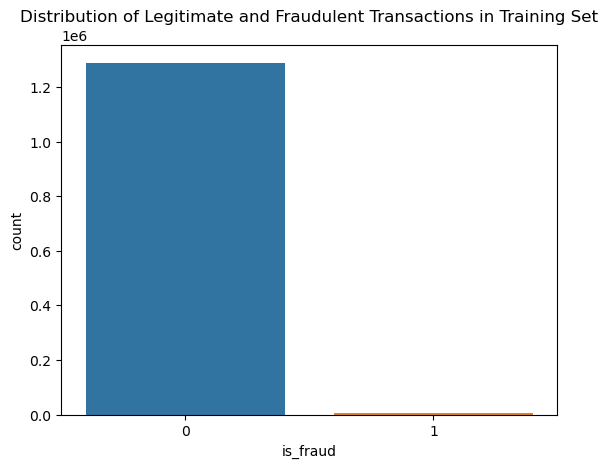

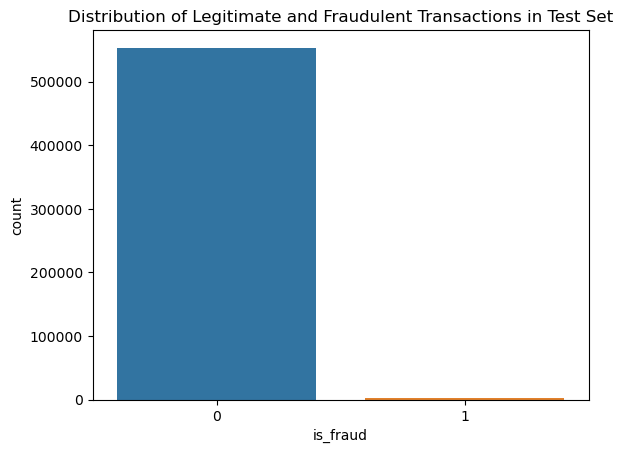

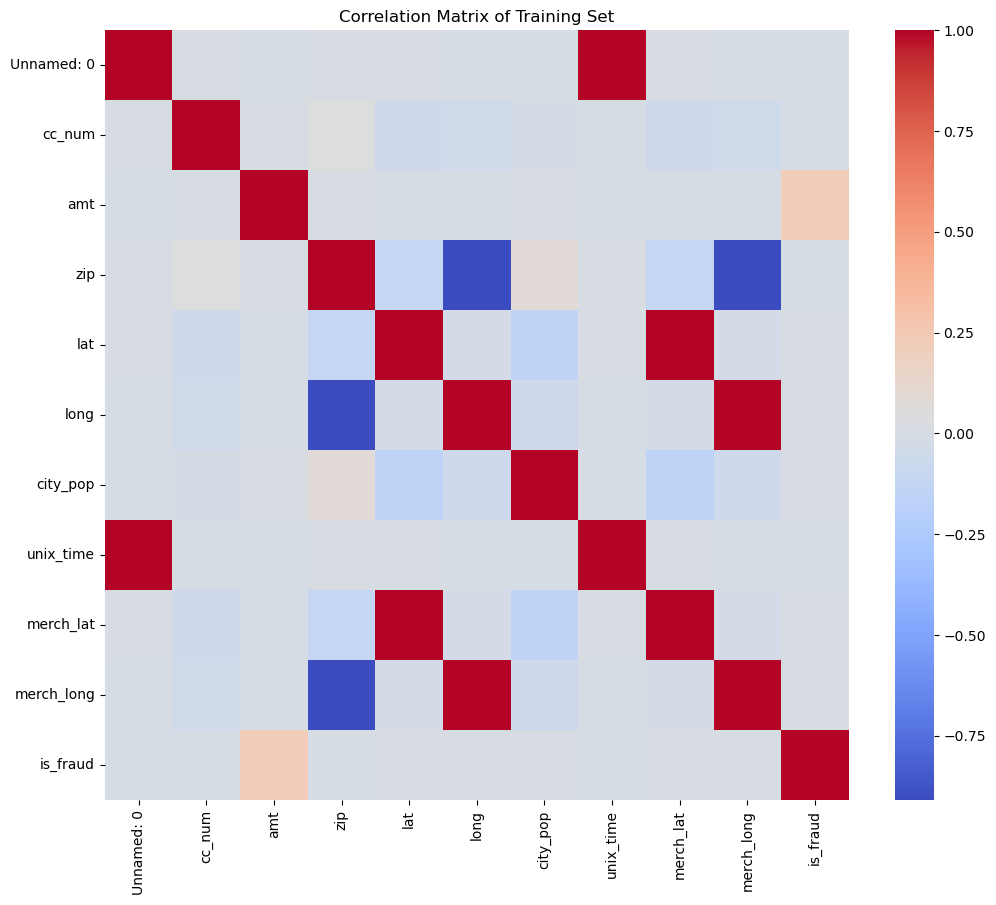

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

target_column = 'is_fraud'

X_train = train_df.select_dtypes(include=['number']).drop(target_column, axis=1)
y_train = train_df[target_column]
X_test = test_df.select_dtypes(include=['number']).drop(target_column, axis=1)
y_test = test_df[target_column]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

sns.countplot(x=target_column, data=train_df)
plt.title('Distribution of Legitimate and Fraudulent Transactions in Training Set')
plt.show()

sns.countplot(x=target_column, data=test_df)
plt.title('Distribution of Legitimate and Fraudulent Transactions in Test Set')
plt.show()

numeric_columns = train_df.select_dtypes(include=['number']).columns
correlation_matrix = train_df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix of Training Set')
plt.show()
